# Weather Trend Forcasting

## Import Data and Packages

In [1]:
import shutil
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import sklearn
import geopandas as gpd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from xgboost import XGBClassifier

c:\Users\salma\miniconda3\envs\tf_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# path = kagglehub.dataset_download("nelgiriyewithana/global-weather-repository")

# print("Path to dataset files:", path)

In [3]:
# shutil.move("C:\\Users\\salma\\.cache\\kagglehub\\datasets\\nelgiriyewithana\\global-weather-repository\\versions\\482", "C:\\Users\\salma\\pyworkspace\\weather-trend-forcasting\\data")

In [4]:
df = pd.read_csv("data/482/GlobalWeatherRepository.csv")
df

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.5200,69.1800,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.400,26.600,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.3300,19.8200,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.100,2.000,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.7600,3.0500,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.400,18.400,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.5000,1.5200,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.700,0.900,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.8400,13.2300,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.400,262.300,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49691,Venezuela,Caracas,10.5000,-66.9167,America/Caracas,1737973800,2025-01-27 06:30,22.3,72.1,Clear,...,14.985,19.240,1,2,06:51 AM,06:30 PM,05:11 AM,04:53 PM,Waning Crescent,7
49692,Vietnam,Hanoi,21.0333,105.8500,Asia/Bangkok,1737973800,2025-01-27 17:30,18.4,65.1,Sunny,...,23.310,27.750,2,2,06:35 AM,05:44 PM,04:39 AM,03:28 PM,Waning Crescent,9
49693,Yemen,Sanaa,15.3547,44.2067,Asia/Aden,1737973800,2025-01-27 13:30,20.1,68.3,Sunny,...,18.130,42.735,2,2,06:33 AM,05:59 PM,04:41 AM,03:59 PM,Waning Crescent,8
49694,Zambia,Lusaka,-15.4167,28.2833,Africa/Lusaka,1737973800,2025-01-27 12:30,24.2,75.5,Light rain shower,...,5.365,5.365,1,1,05:55 AM,06:44 PM,03:36 AM,05:14 PM,Waning Crescent,8


In [5]:
different_standards = ["wind_mph", "temperature_fahrenheit", "last_updated_epoch", "pressure_mb", "precip_mm", "feels_like_fahrenheit", "visibility_miles", "gust_mph"]
df = df.drop(columns=different_standards)

In [6]:
weathers = df["condition_text"].unique()
weathers

array(['Partly Cloudy', 'Partly cloudy', 'Sunny', 'Light drizzle',
       'Clear', 'Overcast', 'Moderate or heavy rain with thunder',
       'Patchy light rain in area with thunder', 'Fog',
       'Patchy light rain with thunder', 'Patchy rain nearby',
       'Light rain', 'Mist', 'Cloudy', 'Thundery outbreaks in nearby',
       'Moderate rain', 'Light rain shower', 'Moderate rain at times',
       'Moderate or heavy rain shower', 'Heavy rain at times',
       'Patchy light rain', 'Patchy light drizzle',
       'Thundery outbreaks possible', 'Patchy rain possible',
       'Moderate or heavy rain in area with thunder', 'Heavy rain',
       'Torrential rain shower', 'Freezing fog',
       'Moderate or heavy snow showers', 'Light sleet', 'Blizzard',
       'Moderate snow', 'Light snow', 'Light sleet showers',
       'Light freezing rain', 'Heavy snow', 'Blowing snow',
       'Patchy heavy snow', 'Light snow showers',
       'Moderate or heavy sleet', 'Patchy light snow',
       'Patchy mo

In [7]:
df.describe()

,latitude,longitude,temperature_celsius,wind_kph,wind_degree,pressure_in,precip_in,humidity,cloud,feels_like_celsius,...,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination
count,49696.000000,49696.000000,49696.000000,49696.000000,49696.000000,49696.000000,49696.000000,49696.000000,49696.000000,49696.000000,...,49696.000000,49696.000000,49696.000000,49696.000000,49696.000000,49696.000000,49696.000000,49696.000000,49696.000000,49696.000000
mean,19.140833,22.203601,22.945694,13.340430,170.844012,29.935694,0.005534,63.325117,40.081918,24.002902,...,19.278570,518.210443,62.810470,14.169951,10.738422,23.726655,46.705987,1.657518,2.531230,49.256479
std,24.480847,65.791240,9.214742,15.798945,103.155171,0.208802,0.024874,24.659555,33.768249,10.951043,...,17.510558,989.890365,37.662815,25.872917,51.722746,45.688969,141.587519,0.964330,2.484448,34.820791
min,-41.300000,-175.200000,-24.800000,3.600000,1.000000,28.470000,0.000000,2.000000,0.000000,-35.600000,...,3.600000,-9999.000000,0.000000,0.000000,-9999.000000,0.185000,0.185000,1.000000,1.000000,0.000000
25%,3.750000,-6.250000,18.200000,6.500000,82.000000,29.830000,0.000000,45.000000,4.000000,18.200000,...,10.800000,220.300000,37.000000,0.900000,0.700000,4.800000,7.770000,1.000000,1.000000,15.000000
50%,17.250000,23.320000,25.300000,11.200000,164.000000,29.910000,0.000000,68.000000,31.000000,26.400000,...,17.000000,312.650000,59.000000,2.960000,2.100000,12.038000,18.870000,1.000000,2.000000,49.000000
75%,40.400000,50.580000,29.000000,18.700000,258.000000,30.030000,0.000000,84.000000,75.000000,31.300000,...,25.700000,480.700000,83.175000,14.430000,7.955000,26.640000,42.550000,2.000000,3.000000,83.000000
max,64.150000,179.220000,49.200000,2963.200000,360.000000,31.890000,1.660000,100.000000,100.000000,51.200000,...,2970.400000,38879.398000,480.700000,427.700000,521.330000,1614.100000,5858.020000,6.000000,10.000000,100.000000


In [8]:
df.columns

Index(['country', 'location_name', 'latitude', 'longitude', 'timezone',
       'last_updated', 'temperature_celsius', 'condition_text', 'wind_kph',
       'wind_degree', 'wind_direction', 'pressure_in', 'precip_in', 'humidity',
       'cloud', 'feels_like_celsius', 'visibility_km', 'uv_index', 'gust_kph',
       'air_quality_Carbon_Monoxide', 'air_quality_Ozone',
       'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide',
       'air_quality_PM2.5', 'air_quality_PM10', 'air_quality_us-epa-index',
       'air_quality_gb-defra-index', 'sunrise', 'sunset', 'moonrise',
       'moonset', 'moon_phase', 'moon_illumination'],
      dtype='object')

In [9]:
numerical_columns = df.select_dtypes(include=[np.number]).columns
categorical_columns = df.select_dtypes(include=[object]).columns
hour_columns = ["sunrise", "sunset", "moonrise", "moonset"]
exception_columns = ["last_updated", "condition_text"]

# Ensure the columns exist before dropping them
columns_to_drop = [col for col in hour_columns + exception_columns if col in categorical_columns]
categorical_columns = categorical_columns.drop(columns_to_drop)

In [10]:
print(df["last_updated"].head())

# Convert the last_updated column to datetime
df["last_updated"] = pd.to_datetime(df["last_updated"])
df["last_updated"].head()

0    2024-05-16 13:15
1    2024-05-16 10:45
2    2024-05-16 09:45
3    2024-05-16 10:45
4    2024-05-16 09:45
Name: last_updated, dtype: object


0   2024-05-16 13:15:00
1   2024-05-16 10:45:00
2   2024-05-16 09:45:00
3   2024-05-16 10:45:00
4   2024-05-16 09:45:00
Name: last_updated, dtype: datetime64[ns]

In [11]:
df[numerical_columns].head()

,latitude,longitude,temperature_celsius,wind_kph,wind_degree,pressure_in,precip_in,humidity,cloud,feels_like_celsius,...,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination
0,34.52,69.18,26.6,13.3,338,29.89,0.00,24,30,25.3,...,15.3,277.0,103.0,1.1,0.2,8.4,26.6,1,1,55
1,41.33,19.82,19.0,11.2,320,29.88,0.00,94,75,19.0,...,18.4,193.6,97.3,0.9,0.1,1.1,2.0,1,1,55
2,36.76,3.05,23.0,15.1,280,29.85,0.00,29,0,24.6,...,22.3,540.7,12.2,65.1,13.4,10.4,18.4,1,1,55
3,42.50,1.52,6.3,11.9,215,29.75,0.01,61,100,3.8,...,13.7,170.2,64.4,1.6,0.2,0.7,0.9,1,1,55
4,-8.84,13.23,26.0,13.0,150,29.85,0.00,89,50,28.7,...,20.2,2964.0,19.0,72.7,31.5,183.4,262.3,5,10,55


In [12]:
df[categorical_columns].head()

,country,location_name,timezone,wind_direction,moon_phase
0,Afghanistan,Kabul,Asia/Kabul,NNW,Waxing Gibbous
1,Albania,Tirana,Europe/Tirane,NW,Waxing Gibbous
2,Algeria,Algiers,Africa/Algiers,W,Waxing Gibbous
3,Andorra,Andorra La Vella,Europe/Andorra,SW,Waxing Gibbous
4,Angola,Luanda,Africa/Luanda,SSE,Waxing Gibbous


In [13]:
df[hour_columns].head()

,sunrise,sunset,moonrise,moonset
0,04:50 AM,06:50 PM,12:12 PM,01:11 AM
1,05:21 AM,07:54 PM,12:58 PM,02:14 AM
2,05:40 AM,07:50 PM,01:15 PM,02:14 AM
3,06:31 AM,09:11 PM,02:12 PM,03:31 AM
4,06:12 AM,05:55 PM,01:17 PM,12:38 AM


## Data Cleaning & Preprocessing

### Change Hour Datatype to Datetime

In [14]:
# change hour columns to datetime datatype
for col in hour_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# remove the date in the hour columns
for col in hour_columns:
    df[col] = df[col].dt.time

df[hour_columns].head()

C:\Users\salma\AppData\Local\Temp\ipykernel_8760\1823431762.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')
C:\Users\salma\AppData\Local\Temp\ipykernel_8760\1823431762.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')
C:\Users\salma\AppData\Local\Temp\ipykernel_8760\1823431762.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')
C:\Users\salma\AppData\Local\Temp\ipykernel_8760\1823431762.py:3: UserWarning: Could not in

,sunrise,sunset,moonrise,moonset
0,04:50:00,18:50:00,12:12:00,01:11:00
1,05:21:00,19:54:00,12:58:00,02:14:00
2,05:40:00,19:50:00,13:15:00,02:14:00
3,06:31:00,21:11:00,14:12:00,03:31:00
4,06:12:00,17:55:00,13:17:00,00:38:00


In [15]:
df.drop(hour_columns, axis=1, inplace=True)

### One Hot Encode the Categorical Columns

In [16]:
# one-hot encode the categorical columns
encoder = OneHotEncoder()
encoded = encoder.fit_transform(df[categorical_columns])
encoded_df = pd.DataFrame(encoded.toarray(), columns=encoder.get_feature_names_out(categorical_columns))

# concatenate one-hot encoded columns with the original dataframe
df = pd.concat([df, encoded_df], axis=1)
df = df.drop(categorical_columns, axis=1)
df.head()

,latitude,longitude,last_updated,temperature_celsius,condition_text,wind_kph,wind_degree,pressure_in,precip_in,humidity,...,wind_direction_WNW,wind_direction_WSW,moon_phase_First Quarter,moon_phase_Full Moon,moon_phase_Last Quarter,moon_phase_New Moon,moon_phase_Waning Crescent,moon_phase_Waning Gibbous,moon_phase_Waxing Crescent,moon_phase_Waxing Gibbous
0,34.52,69.18,2024-05-16 13:15:00,26.6,Partly Cloudy,13.3,338,29.89,0.00,24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,41.33,19.82,2024-05-16 10:45:00,19.0,Partly cloudy,11.2,320,29.88,0.00,94,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,36.76,3.05,2024-05-16 09:45:00,23.0,Sunny,15.1,280,29.85,0.00,29,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,42.50,1.52,2024-05-16 10:45:00,6.3,Light drizzle,11.9,215,29.75,0.01,61,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-8.84,13.23,2024-05-16 09:45:00,26.0,Partly cloudy,13.0,150,29.85,0.00,89,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Encode the label column

In [17]:
Label_encoder = OneHotEncoder()
encoded_label = Label_encoder.fit_transform(df["condition_text"].values.reshape(-1, 1))
encoded_label

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 49696 stored elements and shape (49696, 44)>

### Find Missing Value

In [18]:
# find missing values
df.isnull().sum()

latitude                      0
longitude                     0
last_updated                  0
temperature_celsius           0
condition_text                0
                             ..
moon_phase_New Moon           0
moon_phase_Waning Crescent    0
moon_phase_Waning Gibbous     0
moon_phase_Waxing Crescent    0
moon_phase_Waxing Gibbous     0
Length: 696, dtype: int64

there's no missing value

### Handle outliers

In [19]:
# find outliers of numerical columns with iqrs
def find_outliers_iqr(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return data[(data > upper_bound) | (data < lower_bound)]

columns_with_outliers = []
for col in numerical_columns:
    outliers = find_outliers_iqr(df[col])
    if not outliers.empty:
        columns_with_outliers.append(col)
        print(f"Outliers in {col}: {outliers} \n")

Outliers in longitude: 8        149.2200
58       178.4200
85       139.6900
89       169.5300
107      171.3800
           ...   
49660    159.9500
49677   -175.2000
49682    179.2167
49687   -123.0439
49690    168.3167
Name: longitude, Length: 3823, dtype: float64 

Outliers in temperature_celsius: 35        1.0
784      -1.0
1369      1.0
1564      1.0
2344      0.0
         ... 
49615   -21.6
49628    -4.4
49630     0.4
49663    -0.8
49669    -1.9
Name: temperature_celsius, Length: 1503, dtype: float64 

Outliers in wind_kph: 123      37.1
153      41.0
239      41.0
246      37.1
259      38.9
         ... 
49601    37.8
49608    37.8
49646    38.9
49648    37.4
49665    42.1
Name: wind_kph, Length: 650, dtype: float64 

Outliers in pressure_in: 22       30.36
95       30.39
119      30.50
161      30.45
305      30.36
         ...  
49630    29.38
49651    29.21
49686    29.03
49687    30.45
49689    30.36
Name: pressure_in, Length: 3407, dtype: float64 

Outliers in precip_in: 3

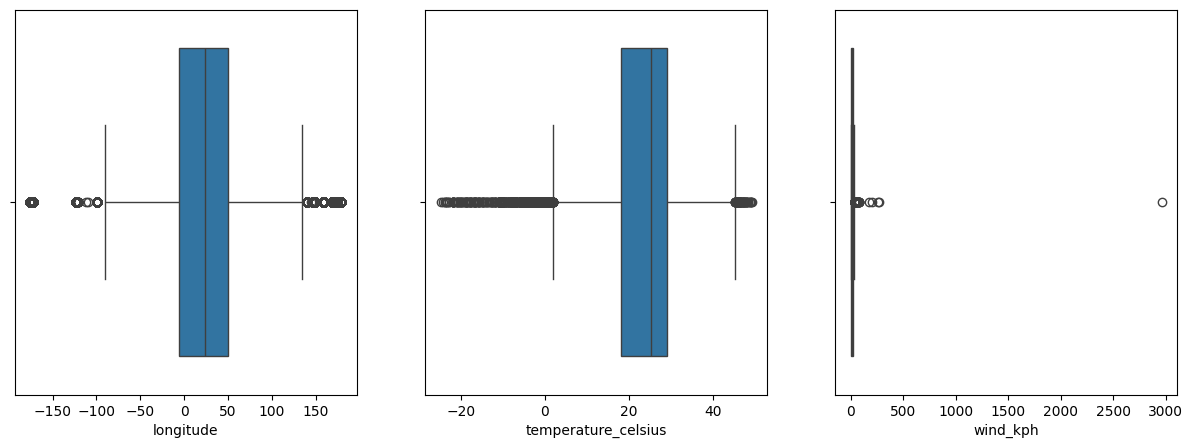

In [20]:
# Plot example of outliers before removing
columns_with_outliers[:3]
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(x=df[columns_with_outliers[0]], ax=ax[0])
sns.boxplot(x=df[columns_with_outliers[1]], ax=ax[1])
sns.boxplot(x=df[columns_with_outliers[2]], ax=ax[2])
plt.show()

In [21]:
# change outliers with iqr method
def change_outliers_iqr(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    data = np.where(data > upper_bound, upper_bound, data)
    data = np.where(data < lower_bound, lower_bound, data)
    return data

for col in numerical_columns:
    # if columns is precip_in skip the change_outliers_iqr function
    if col == "precip_in":
        continue
    df[col] = change_outliers_iqr(df[col])

# check if outliers are changed
for col in numerical_columns:
    outliers = find_outliers_iqr(df[col])
    if not outliers.empty:
        print(f"Outliers in {col}: {outliers} \n")


Outliers in precip_in: 3        0.01
7        0.01
16       0.01
19       0.01
40       0.01
         ... 
49673    0.01
49675    0.05
49677    0.07
49690    0.01
49694    0.07
Name: precip_in, Length: 7985, dtype: float64 



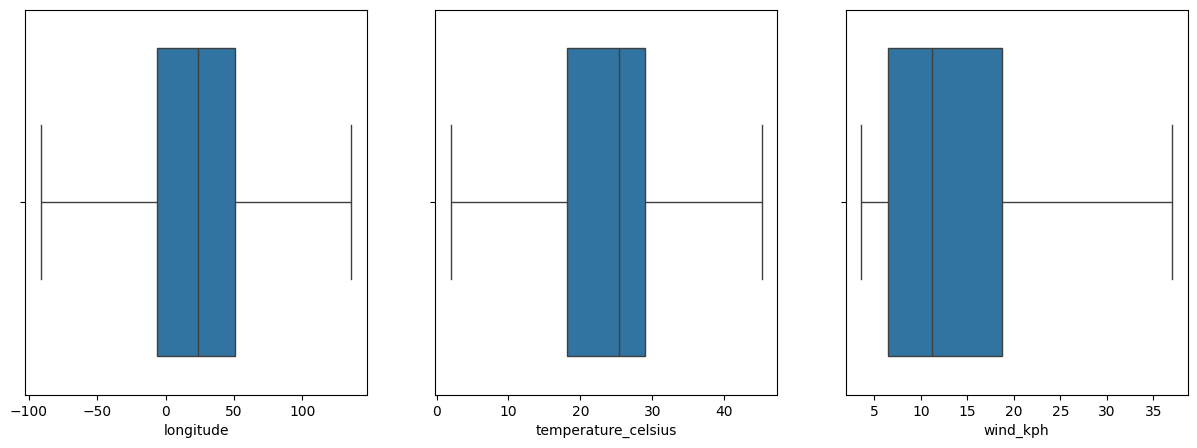

In [22]:
# plot example of outliers after changing
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(x=df[columns_with_outliers[0]], ax=ax[0])
sns.boxplot(x=df[columns_with_outliers[1]], ax=ax[1])
sns.boxplot(x=df[columns_with_outliers[2]], ax=ax[2])
plt.show()

### Normalize Data

In [23]:
# data before normalization
df[numerical_columns].head()

,latitude,longitude,temperature_celsius,wind_kph,wind_degree,pressure_in,precip_in,humidity,cloud,feels_like_celsius,...,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination
0,34.52,69.18,26.6,13.3,338.0,29.89,0.00,24.0,30.0,25.3,...,15.3,277.0,103.0,1.100,0.2000,8.4,26.60,1.0,1.0,55.0
1,41.33,19.82,19.0,11.2,320.0,29.88,0.00,94.0,75.0,19.0,...,18.4,193.6,97.3,0.900,0.1000,1.1,2.00,1.0,1.0,55.0
2,36.76,3.05,23.0,15.1,280.0,29.85,0.00,29.0,0.0,24.6,...,22.3,540.7,12.2,34.725,13.4000,10.4,18.40,1.0,1.0,55.0
3,42.50,1.52,6.3,11.9,215.0,29.75,0.01,61.0,100.0,3.8,...,13.7,170.2,64.4,1.600,0.2000,0.7,0.90,1.0,1.0,55.0
4,-8.84,13.23,26.0,13.0,150.0,29.85,0.00,89.0,50.0,28.7,...,20.2,871.3,19.0,34.725,18.8375,59.4,94.72,3.5,6.0,55.0


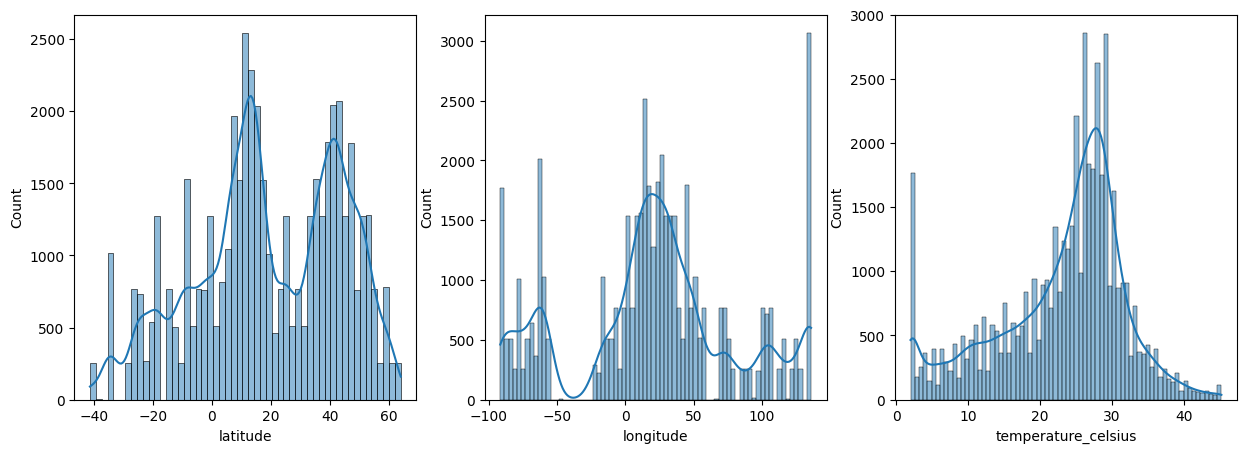

In [24]:
# plot data before normalization
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(df[numerical_columns[0]], ax=ax[0], kde=True)
sns.histplot(df[numerical_columns[1]], ax=ax[1], kde=True)
sns.histplot(df[numerical_columns[2]], ax=ax[2], kde=True)
plt.show()

In [25]:
# normalize numerical columns
df[numerical_columns] = preprocessing.normalize(df[numerical_columns])

# data after normalization
df[numerical_columns].head()

,latitude,longitude,temperature_celsius,wind_kph,wind_degree,pressure_in,precip_in,humidity,cloud,feels_like_celsius,...,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination
0,0.074337,0.148975,0.057281,0.028641,0.727862,0.064366,0.000000,0.051683,0.064603,0.054482,...,0.032948,0.596502,0.221804,0.002369,0.000431,0.018089,0.057281,0.002153,0.002153,0.118439
1,0.099903,0.047909,0.045927,0.027073,0.773509,0.072226,0.000000,0.227218,0.181291,0.045927,...,0.044477,0.467973,0.235195,0.002175,0.000242,0.002659,0.004834,0.002417,0.002417,0.132947
2,0.059567,0.004942,0.037270,0.024468,0.453718,0.048370,0.000000,0.046992,0.000000,0.039862,...,0.036135,0.876162,0.019769,0.056269,0.021714,0.016852,0.029816,0.001620,0.001620,0.089123
3,0.134888,0.004824,0.019995,0.037769,0.682373,0.094421,0.000032,0.193604,0.317383,0.012061,...,0.043481,0.540186,0.204395,0.005078,0.000635,0.002222,0.002856,0.003174,0.003174,0.174561
4,-0.009804,0.014673,0.028836,0.014418,0.166362,0.033106,0.000000,0.098708,0.055454,0.031831,...,0.022403,0.966344,0.021073,0.038513,0.020892,0.065880,0.105052,0.003882,0.006654,0.061000


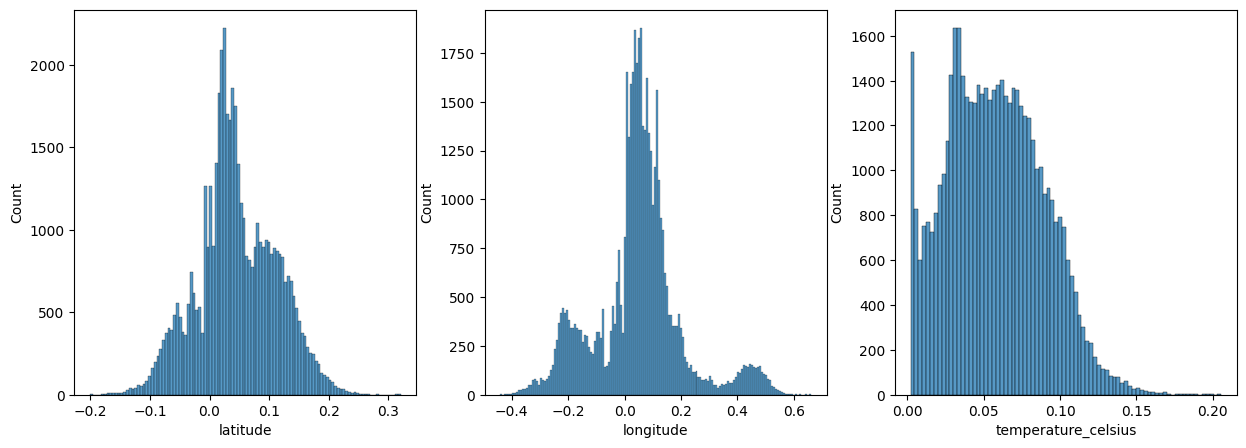

In [26]:
# plot normalized data
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(df[numerical_columns[0]], ax=ax[0])
sns.histplot(df[numerical_columns[1]], ax=ax[1])
sns.histplot(df[numerical_columns[2]], ax=ax[2])
plt.show()

## Exploratory Data Analysis (EDA)

### Find Trend

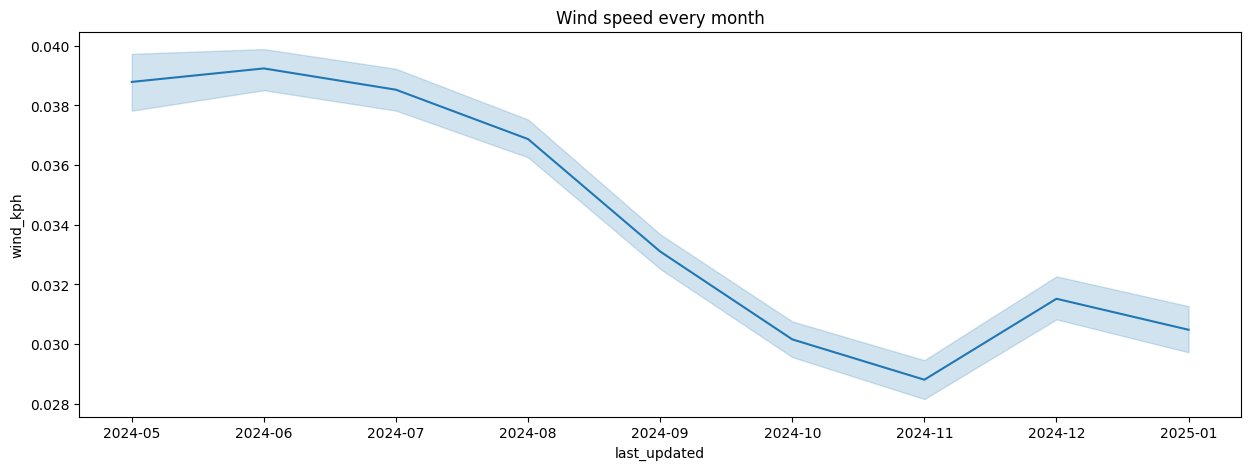

In [27]:
# find trend in windowed data
windowed_data = df["last_updated"].dt.to_period("M").astype(str)

# plot wind speed every month
plt.figure(figsize=(15, 5))
sns.lineplot(x=windowed_data, y=df["wind_kph"])
plt.title("Wind speed every month")
plt.show()

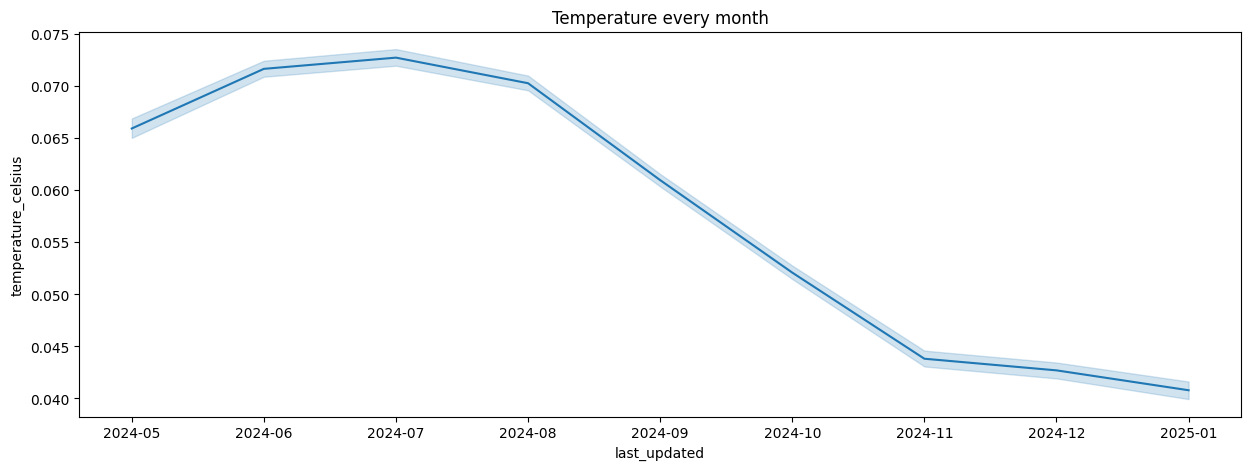

In [28]:
# plot temperature every month
plt.figure(figsize=(15, 5))
sns.lineplot(x=windowed_data, y=df["temperature_celsius"])
plt.title("Temperature every month")
plt.show()

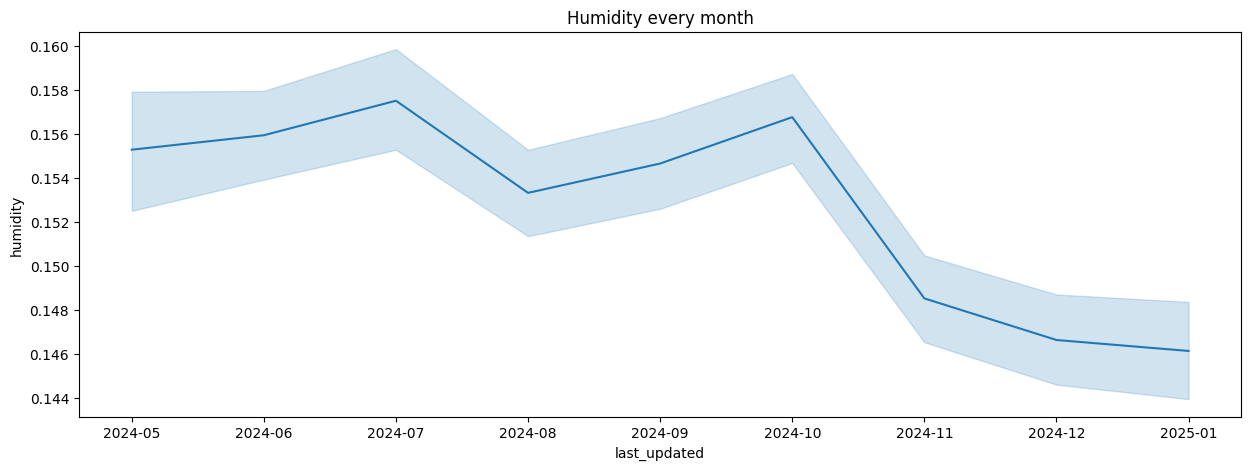

In [29]:
# plot humidity every month
plt.figure(figsize=(15, 5))
sns.lineplot(x=windowed_data, y=df["humidity"])
plt.title("Humidity every month")
plt.show()

### Find Correlation between Columns

In [30]:
# find correlation between numerical columns
correlation = df[numerical_columns].corr()

correlation score explanation

if close to 1, it means that the two columns are positively correlated

if close to -1, it means that the two columns are negatively correlated

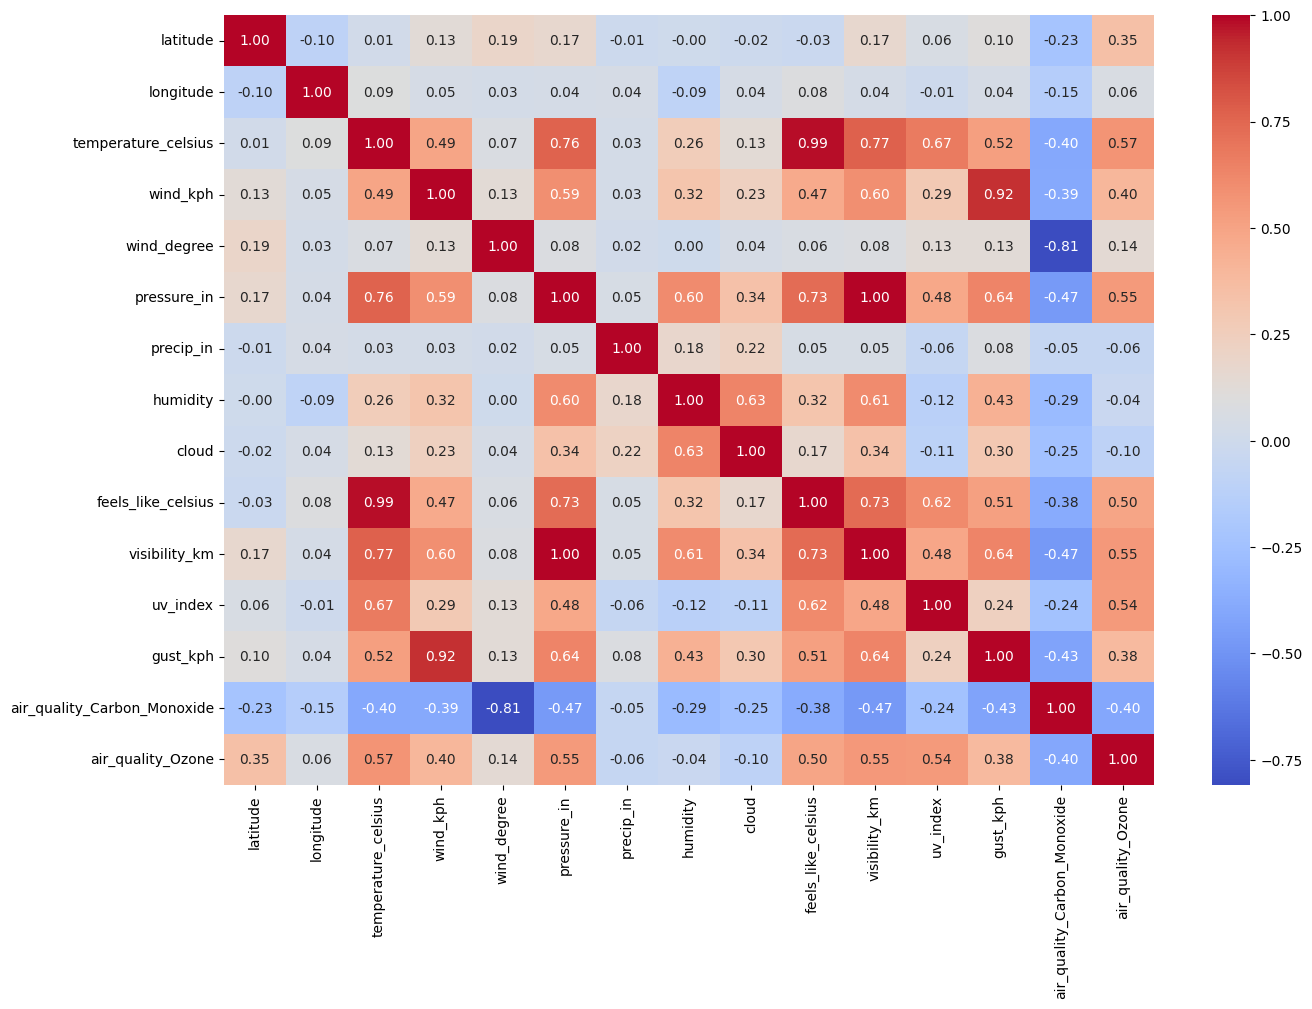

In [31]:
# plot correlation of 15 columns
plt.figure(figsize=(15, 10))
sns.heatmap(correlation.iloc[:15, :15], annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

## Modelling

In [32]:
# train test split
X = df.drop(["condition_text", "last_updated"], axis=1)
y = encoded_label.toarray()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
validation_score = []

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    
    validation_score.append({
        "accuracy": accuracy,
        "f1": f1,
        "precision": precision,
        "recall": recall
    })

### Gradien Model

In [34]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
evaluate_model(xgb, X_test, y_test)

c:\Users\salma\miniconda3\envs\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\salma\miniconda3\envs\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\salma\miniconda3\envs\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Ensemble Based Model

In [35]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
evaluate_model(rf, X_test, y_test)

c:\Users\salma\miniconda3\envs\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\salma\miniconda3\envs\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\salma\miniconda3\envs\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:

### Neural Network Based Model

In [36]:
X_train = tf.data.Dataset.from_tensor_slices(X_train)
y_train = tf.data.Dataset.from_tensor_slices(y_train)

train_dataset = tf.data.Dataset.zip((X_train, y_train))

X_test = tf.data.Dataset.from_tensor_slices(X_test)
y_test = tf.data.Dataset.from_tensor_slices(y_test)

test_dataset = tf.data.Dataset.zip((X_test, y_test))

# shuffle and batch the dataset
train_dataset = train_dataset.shuffle(1024).batch(32)
train_dataset = train_dataset.prefetch(tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.batch(32)
test_dataset = test_dataset.prefetch(tf.data.experimental.AUTOTUNE)

In [37]:
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model

# Correct input shape for 2D data
input_layer = Input(shape=(694,))  # Remove the extra None dimension
dense1 = Dense(256, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001))(input_layer)
dropout1 = Dropout(0.3)(dense1)
dense2 = Dense(128, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001))(dropout1)
dropout2 = Dropout(0.3)(dense2)
dense3 = Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001))(dropout2)
dropout3 = Dropout(0.3)(dense3)

residual = Dense(64, activation="relu")(input_layer)
residual_connection = tf.keras.layers.add([dropout3, residual])
output_layer = Dense(44, activation="softmax")(residual_connection)

model = Model(inputs=input_layer, outputs=output_layer)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss="categorical_crossentropy", 
              metrics=["accuracy"])

model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 694)]                0         []                            
                                                                                                  
 dense (Dense)               (None, 256)                  177920    ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 256)                  0         ['dense[0][0]']               
                                                                                                  
 dense_1 (Dense)             (None, 128)                  32896     ['dropout[0][0]']             
                                                                                             

In [38]:
model.fit(train_dataset,
          epochs=50,
          validation_data=test_dataset)

Epoch 1/50


1243/1243 [==============================] - 15s 10ms/step - loss: 1.6566 - accuracy: 0.5896 - val_loss: 1.2657 - val_accuracy: 0.6795
Epoch 2/50
1243/1243 [==============================] - 11s 9ms/step - loss: 1.2357 - accuracy: 0.6712 - val_loss: 1.1561 - val_accuracy: 0.7010
Epoch 3/50
1243/1243 [==============================] - 10s 8ms/step - loss: 1.1433 - accuracy: 0.6886 - val_loss: 1.1062 - val_accuracy: 0.7049
Epoch 4/50
1243/1243 [==============================] - 13s 11ms/step - loss: 1.0932 - accuracy: 0.6971 - val_loss: 1.0924 - val_accuracy: 0.7052
Epoch 5/50
1243/1243 [==============================] - 14s 11ms/step - loss: 1.0505 - accuracy: 0.7053 - val_loss: 1.0503 - val_accuracy: 0.7129
Epoch 6/50
1243/1243 [==============================] - 13s 10ms/step - loss: 1.0156 - accuracy: 0.7128 - val_loss: 1.0246 - val_accuracy: 0.7184
Epoch 7/50
1243/1243 [==============================] - 15s 12ms/step - loss: 0.9849 - accuracy: 0.7175 - val_loss: 1.0042 -

In [39]:
test_features = test_dataset.map(lambda x, y: x)
test_labels = test_dataset.map(lambda x, y: y)

y_pred = model.predict(test_features)

# Convert test_labels to a NumPy array
test_labels_np = np.concatenate(list(test_labels.as_numpy_iterator()), axis=0)

# Convert y_pred to label indices
y_pred_labels = np.argmax(y_pred, axis=1)

# Convert test_labels_np to label indices
test_labels_np_labels = np.argmax(test_labels_np, axis=1)

accuracy = accuracy_score(test_labels_np_labels, y_pred_labels)
f1 = f1_score(test_labels_np_labels, y_pred_labels, average="weighted")
precision = precision_score(test_labels_np_labels, y_pred_labels, average="weighted")
recall = recall_score(test_labels_np_labels, y_pred_labels, average="weighted")

validation_score.append({
    "accuracy": accuracy,
    "f1": f1,
    "precision": precision,
    "recall": recall
})

validation_score

311/311 [==============================] - 1s 4ms/step


c:\Users\salma\miniconda3\envs\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[{'accuracy': 0.7251509054325955,
  'f1': 0.760851006717427,
  'precision': 0.814027546909471,
  'recall': 0.7536217303822937},
 {'accuracy': 0.6116700201207244,
  'f1': 0.649032373038148,
  'precision': 0.8139589101822812,
  'recall': 0.6116700201207244},
 {'accuracy': 0.7449698189134809,
  'f1': 0.7162845293098946,
  'precision': 0.7086480068480934,
  'recall': 0.7449698189134809}]

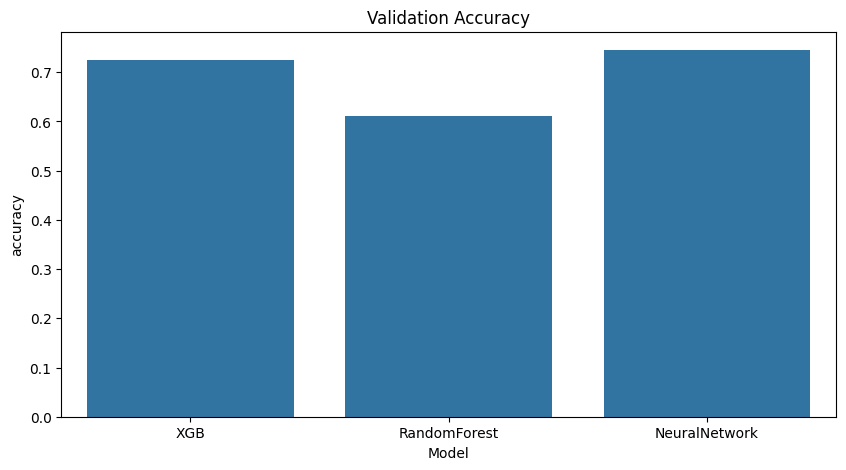

In [42]:
validation_score_df = pd.DataFrame(validation_score, index=["XGB", "RandomForest", "NeuralNetwork"])

# plot the validation scores
plt.figure(figsize=(10, 5))
sns.barplot(data=validation_score_df.reset_index(), x="index", y="accuracy")
plt.title("Validation Accuracy")
plt.xlabel("Model")
plt.show()

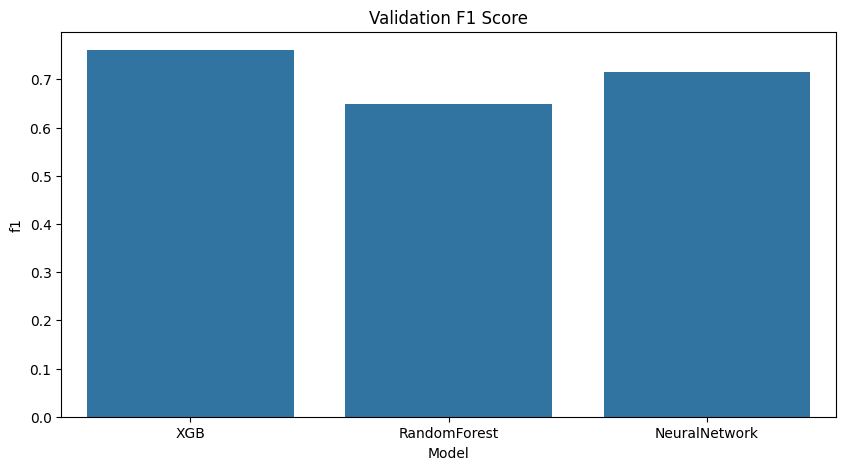

In [43]:
# Plot the F1 scores
plt.figure(figsize=(10, 5))
sns.barplot(data=validation_score_df.reset_index(), x="index", y="f1")
plt.title("Validation F1 Score")
plt.xlabel("Model")
plt.show()

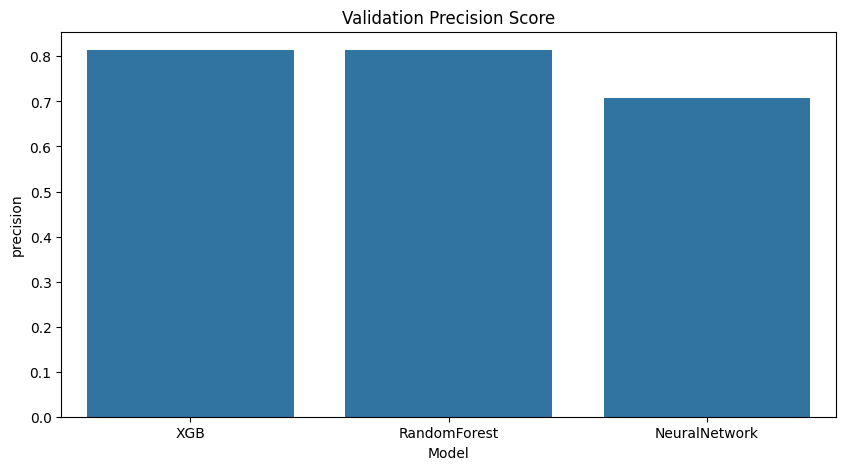

In [44]:
# Plot the precision scores
plt.figure(figsize=(10, 5))
sns.barplot(data=validation_score_df.reset_index(), x="index", y="precision")
plt.title("Validation Precision Score")
plt.xlabel("Model")
plt.show()

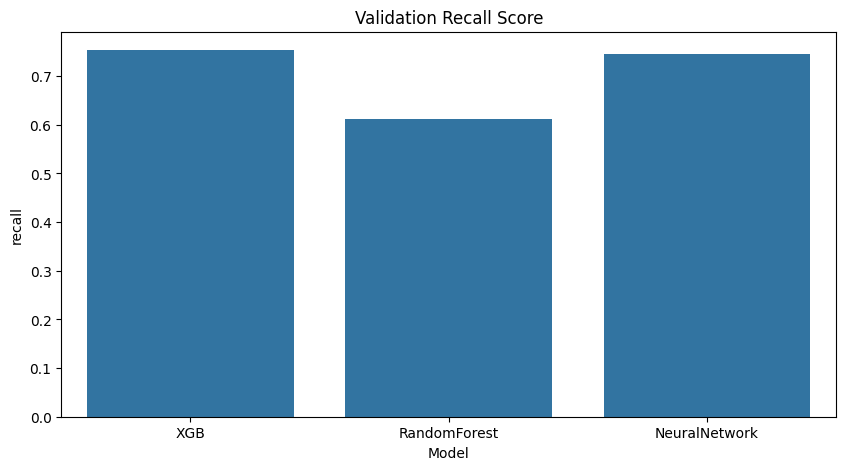

In [45]:
# Plot the recall scores
plt.figure(figsize=(10, 5))
sns.barplot(data=validation_score_df.reset_index(), x="index", y="recall")
plt.title("Validation Recall Score")
plt.xlabel("Model")
plt.show()

## Predict New Data

In [ ]:
# create a new dataframe with the columns that will be used for the model
new_data = pd.DataFrame({
    "country": ["Indonesia"],
    "location_name": ["Jakarta"],
    "latitude": [-6.21],
    "longitude": [106.85],
    "timezone": ["Asia/Jakarta"],
    "temperature_celsius": [20],
    "wind_kph": [10],
    "wind_degree": [90],
    "wind_direction": ["E"],
    "pressure_in": [30],
    "precip_in": [0],
    "humidity": [50],
    "cloud": [30],
    "feels_like_celsius": [20],
    "visibility_km": [10],
    "uv_index": [5],
    "gust_kph": [15],
    "air_quality_Carbon_Monoxide": [0.1],
    "air_quality_Ozone": [0.1],
    "air_quality_Nitrogen_dioxide": [0.1],
    "air_quality_Sulphur_dioxide": [0.1],
    "air_quality_PM2.5": [0.1],
    "air_quality_PM10": [0.1],
    "air_quality_us-epa-index": [1],
    "air_quality_gb-defra-index": [1],
    "moon_phase": ["New Moon"],
    "moon_illumination": [0.1]
})

def do_inference(data):
    # one-hot encode the categorical columns
    encoded = encoder.transform(data[categorical_columns])
    encoded_df = pd.DataFrame(encoded.toarray(), columns=encoder.get_feature_names_out(categorical_columns))

    # concatenate one-hot encoded columns with the original dataframe
    data = pd.concat([data, encoded_df], axis=1)
    data = data.drop(categorical_columns, axis=1)

    # normalize numerical columns
    data[numerical_columns] = preprocessing.normalize(data[numerical_columns])

    # Ensure the data has the correct shape
    data = data.reindex(columns=X.columns, fill_value=0)

    # make inference
    prediction = model.predict(data)
    prediction = np.argmax(prediction, axis=1)
    prediction = weathers[prediction]
    return prediction

do_inference(new_data)    

1/1 [==============================] - 0s 21ms/step


array(['Blizzard'], dtype=object)

## Unique Analysis

### Geospasial Anaysis of air quality

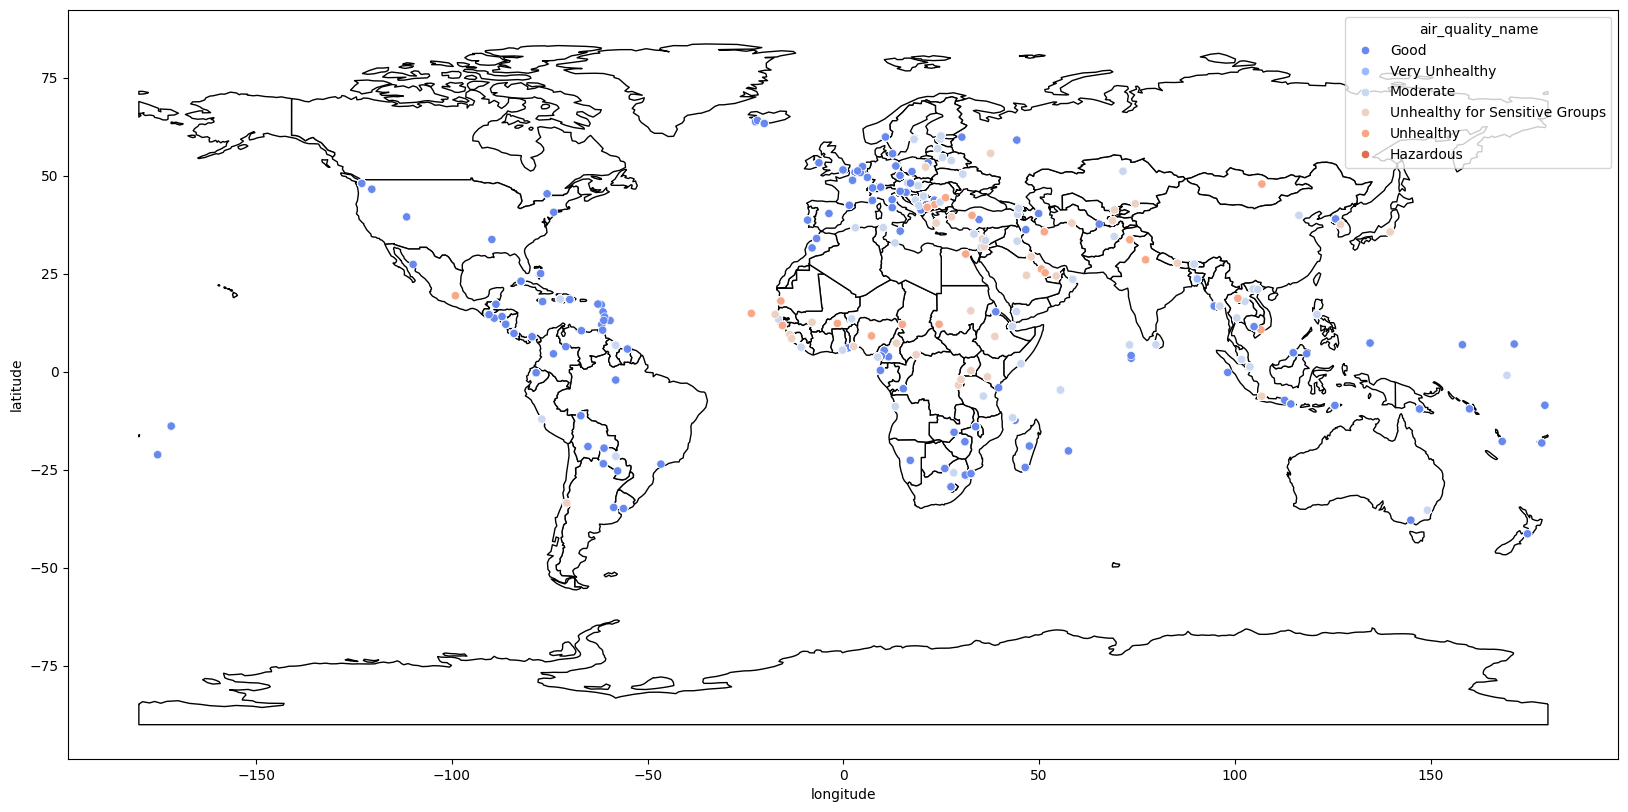

In [ ]:
# plot world map and color the countries based on the air quality
plt.figure(figsize=(20, 20))
world = gpd.read_file("data/shp/1/ne_110m_admin_0_countries.shp")
ax = plt.gca()
world.plot(ax=ax, color='white', edgecolor='black')

# Create a dictionary to map air quality index values to names
air_quality_names = {
    1: 'Good',
    2: 'Moderate',
    3: 'Unhealthy for Sensitive Groups',
    4: 'Unhealthy',
    5: 'Very Unhealthy',
    6: 'Hazardous'
}

# Map the air quality index values to names
df['air_quality_name'] = df['air_quality_us-epa-index'].map(air_quality_names)

sns.scatterplot(data=df, x="longitude", y="latitude", hue="air_quality_name", palette="coolwarm", ax=ax)
plt.show()

### Geospasial Anaysis of temperature

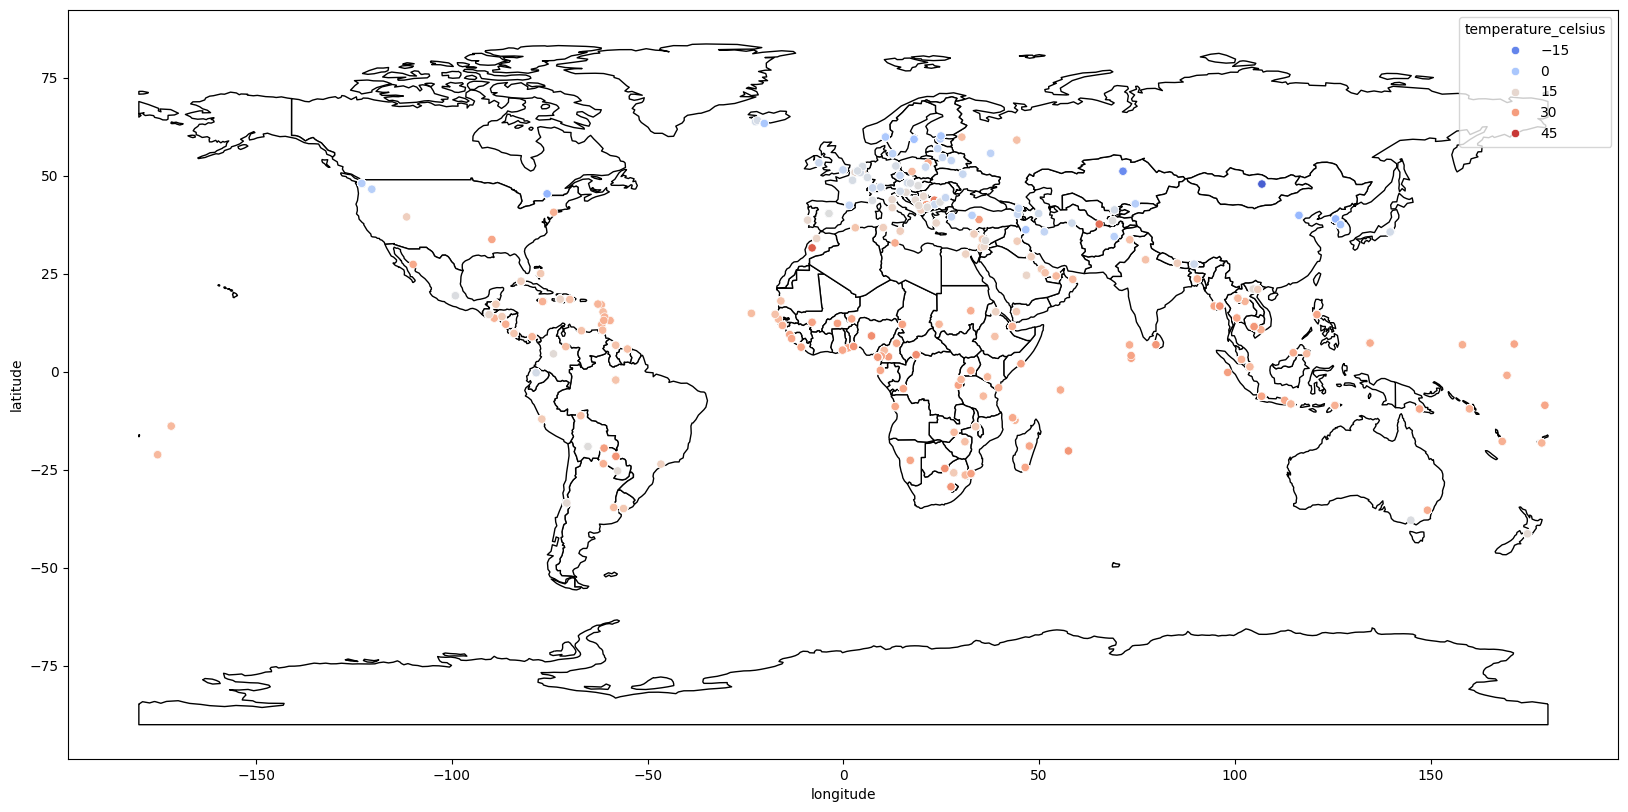

In [ ]:
# plot world map and color the countries based on the temperature
plt.figure(figsize=(20, 20))
world = gpd.read_file("data/shp/1/ne_110m_admin_0_countries.shp")
ax = plt.gca()
world.plot(ax=ax, color='white', edgecolor='black')

sns.scatterplot(data=df, x="longitude", y="latitude", hue="temperature_celsius", palette="coolwarm", ax=ax)
plt.show()